# Hardware Setup

### Original Cuda and Nvidia drivers

In [ ]:
!pip install ipython-autotime
%load_ext autotime

print('==================== Nvidia Driver ====================')
! nvidia-smi
print('==================== Python ====================')
! python -V
print('==================== nvcc Driver ====================')
! nvcc --version
print('==================== OS ====================')
! cat /etc/os-release

# The CUDA version from driver is different from the nvcc is fine.
# PyTorch should align with the nvcc CUDA
# Source:
# https://www.jianshu.com/p/eb5335708f2a

==================== Nvidia Driver ====================
Thu Mar  3 00:50:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                

### Install Mini-conda

In [ ]:
# Tutorial:
# https://towardsdatascience.com/conda-google-colab-75f7c867a522 (not valid)
# https://medium.com/data-professor/how-to-install-conda-on-google-colab-e7bbf9036f76 (works!)

! which python # should return /usr/local/bin/python
! python --version 
# Return Python 3.7.12, we choose 

! echo $PYTHONPATH

# Unset the PYTHONPATH variable with the following command. 
# This step is optional but if you don’t unset this variable then you will see a warning message after installing Miniconda.

%env PYTHONPATH=


/usr/local/bin/python
Python 3.7.12
/env/python
env: PYTHONPATH=
time: 341 ms (started: 2022-03-03 00:50:41 +00:00)


In [ ]:
# %%bash
# MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.12-Linux-x86.sh	
# MINICONDA_PREFIX=/usr/local
# wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
# chmod +x $MINICONDA_INSTALLER_SCRIPT
# ./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
sys.path.append('/usr/local/lib/python3.6/site-packages/')


--2022-03-03 00:50:42--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  18.1MB/s    in 4.5s    

2022-03-03 00:50:46 (18.0 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37

In [ ]:
! rm Miniconda3-py37_4.8.2-Linux-x86_64.sh


time: 117 ms (started: 2022-03-03 00:51:03 +00:00)


In [ ]:
! which conda # should return /usr/local/bin/conda
! conda --version # should return 4.5.12
! which python # still returns /usr/local/bin/python
! python --version # now returns Python 3.7.1 :: Anaconda, Inc.


/usr/local/bin/conda
conda 4.8.2
/usr/local/bin/python
Python 3.7.6
time: 558 ms (started: 2022-03-03 00:51:03 +00:00)


### Updating Conda to Python 3.6


In [ ]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py36h27cfd23_1003         320 KB
    ca-certificates-2022.2.1   |       h06a4308_0         122 KB
    certifi-2021.5.30          |   py36h06a4308_0         139 KB
    cffi-1.14.0                |   py36h2e261b9_0         223 KB
    charset-normalizer-2.0.4   |     pyhd3eb1b0_0          35 KB
    conda-4.10.3               |   py36h06a4308_0         2.9 MB
    conda-package-handling-1.7.3|   py36h27cfd23_1         882 KB
    cryptography-35.0.0   



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




time: 38.9 s (started: 2022-03-03 00:51:22 +00:00)


In [ ]:
! conda --version # now returns 4.10.3
! python --version # now returns Python 3.6.13 :: Anaconda, Inc.


conda 4.10.3
Python 3.6.13 :: Anaconda, Inc.
time: 327 ms (started: 2022-03-03 00:52:01 +00:00)


In [ ]:
# !conda install --channel conda-forge featuretools --yes

time: 1.82 ms (started: 2022-03-03 00:52:01 +00:00)


In [ ]:
! python -V

Python 3.6.13 :: Anaconda, Inc.
time: 122 ms (started: 2022-03-03 00:52:01 +00:00)


Import Git from Google Drive
The Git+datasets is stored at my personal drive. Run ```!cp -R /content/gdrive/MyDrive/Project/3D-SDN  /content/``` to retrieve or ```!cp -R /content/3D-SDN /content/gdrive/MyDrive/Project/``` to backup.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
time: 22.3 s (started: 2022-03-03 00:52:11 +00:00)


In [ ]:

## Backup modified import modules
# !cp -R /content/3D-SDN /content/gdrive/MyDrive/Project/

# Import modules from Google Drive

! cp -R /content/gdrive/MyDrive/Project/3D-SDN  /content/

! pwd
! conda config --append channels conda-forge
! conda env create --name 3dsdn --file /content/3D-SDN/environment.yml
! source activate 3dsdn && conda env list


/content
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

### Downgrade CUDA (nvcc) from 11.0 to 9.0

In [ ]:
! conda env list
# ! conda list -n 3dsdn

# conda environments:
#
base                  *  /usr/local
3dsdn                    /usr/local/envs/3dsdn

time: 622 ms (started: 2022-03-03 01:04:20 +00:00)


In [ ]:
# Source:
# 1. https://gist.github.com/andyweizhao/639e94b60c166f57964aafedeb465e90(not valid)
# 2. https://stackoverflow.com/questions/60831967/downgrade-cuda-version-on-colab-to-9 (final)

!sudo apt-get install gcc-6 g++-6 g++-6-multilib gfortran-6
!sudo update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-6 60 --slave /usr/bin/g++ g++ /usr/bin/g++-6
!sudo update-alternatives --config gcc

# remove if exists
!rm -rf cuda-repo-ubuntu1704-9-0-176-local-patch-4_1.0-1_amd64-deb || true
!rm -rf cuda-repo-ubuntu1704-9-0-176-local-patch-4_1.0-1_amd64-deb.1 || true
!rm -rf cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb || true
!rm -rf cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb.1 || true

!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1

!export PATH=$PATH:/usr/local/cuda-9.0/bin
!export CUDADIR=/usr/local/cuda-9.0
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda-9.0/lib64

!nvidia-smi
!python -V
!nvcc --version
!rm -rf cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-6 gcc-6-base gcc-6-multilib gcc-7-multilib gcc-multilib lib32asan3
  lib32asan4 lib32atomic1 lib32cilkrts5 lib32gcc-6-dev lib32gcc-7-dev
  lib32gomp1 lib32itm1 lib32mpx2 lib32quadmath0 lib32stdc++-6-dev lib32ubsan0
  libasan3 libc6-dev-i386 libc6-dev-x32 libc6-x32 libgcc-6-dev
  libgfortran-6-dev libgfortran3 libstdc++-6-dev libx32asan3 libx32asan4
  libx32atomic1 libx32cilkrts5 libx32gcc-6-dev libx32gcc-7-dev libx32gcc1
  libx32gomp1 libx32itm1 libx32quadmath0 libx32stdc++-6-dev libx32stdc++6
  libx32ubsan0
Suggested packages:
  gcc-6-locales gcc-6-doc libstdc++6-6-dbg lib32stdc++6-6-dbg
  libx32stdc++6-6-dbg libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg
  libasan3-dbg liblsan0-dbg libtsan

In [ ]:
print('==================== Nvidia Driver ====================')
! nvidia-smi
print('==================== nvcc Driver ====================')
! nvcc --version
! conda list -n 3dsdn
! conda activate 3dsdn
! source activate 3dsdn && conda env list
! conda env list

print('==================== pytorch ====================')
!pip uninstall torch
import torch
print(torch.__version__)

# The CUDA version from driver is different from the nvcc is fine.
# PyTorch should align with the nvcc CUDA
# Source:
# https://www.jianshu.com/p/eb5335708f2a

==================== Nvidia Driver ====================
Thu Mar  3 01:07:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                

# 3D-SDN Example

In [ ]:
# ! git clone https://github.com/ysymyth/3D-SDN

import torch
print(torch.__version__)
print(torch.version.cuda) 
print(torch.cuda.is_available())

%cd /content/3D-SDN

!gcc --version

! chmod 755 ./scripts/build.sh


1.10.0+cu111
11.1
True
/content/3D-SDN
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

time: 291 ms (started: 2022-03-03 01:07:22 +00:00)


In [ ]:
%%shell
  eval "$(conda shell.bash hook)" # copy conda command to shell
  source activate 3dsdn
  conda install -y ipykernel

# ! source activate 3dsdn
 source activate 3dsdn && conda list
 ./scripts/build.sh

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/3dsdn

  added / updated specs:
    - ipykernel


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    entrypoints-0.3            |           py36_0          12 KB
    ipykernel-4.9.0            |           py36_1         152 KB
    ipython-5.8.0              |           py36_1         1.1 MB  conda-forge
    ipython_genutils-0.2.0     |     pyhd3eb1b0_1          27 KB
    jupyter_client-7.1.2       |     pyhd3eb1b0_0          93 KB
    jupyter_core-4.8.1         |   py36h06a4308_0          74 KB
    l

time: 31.5 s (started: 2022-03-03 01:07:29 +00:00)


Populating the interactive namespace from numpy and matplotlib


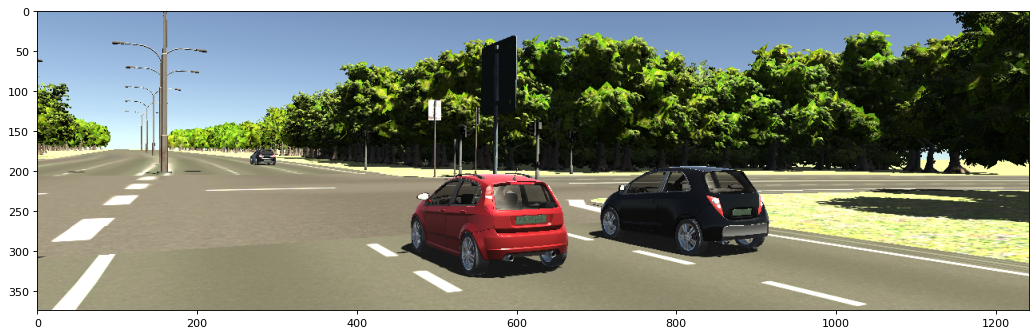

time: 567 ms (started: 2022-03-03 01:09:02 +00:00)


In [ ]:
 # Display ./assets/0006_30-deg-right_00043.png as the example image for editing.

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/3D-SDN/assets/0006_30-deg-right_00043.png')
figure(figsize=(16, 12), dpi=80)
imgplot = plt.imshow(img)
plt.show()

### Semantic Branch


In [ ]:
%%shell
eval "$(conda shell.bash hook)" # copy conda command to shell
conda activate 3dsdn

python semantic/vkitti_test.py \
    --ckpt ./models \
    --id vkitti-semantic \
    --root_dataset ./assets \
    --test_img 0006_30-deg-right_00043.png \
    --result ./assets/example/semantic


Namespace(arch_decoder='ppm_bilinear_deepsup', arch_encoder='resnet50_dilated8', batch_size=1, benchmark_json='', ckpt='./models', fc_dim=2048, gpu_id=0, id='vkitti-semantic', imgMaxSize=1242, imgSize=[100, 150, 200, 300, 375], num_class=14, num_val=-1, padding_constant=8, result='./assets/example/semantic', root_dataset='./assets', segm_downsampling_rate=8, suffix='_epoch_25.pth', test_img='0006_30-deg-right_00043.png', visualize=False)
Loading weights for net_encoder
Loading weights for net_decoder
# samples: 1
/usr/local/envs/3dsdn/lib/python3.6/site-packages/torch/nn/functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
Test Done!


time: 10.6 s (started: 2022-03-03 01:09:08 +00:00)


Populating the interactive namespace from numpy and matplotlib


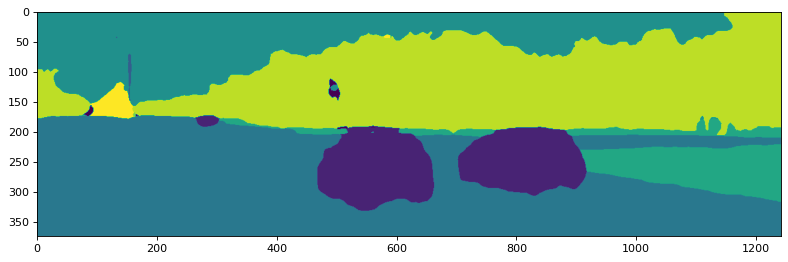

time: 252 ms (started: 2022-03-03 01:09:19 +00:00)


In [ ]:
# Display ./assets/0006_30-deg-right_00043.png as the example image for editing.

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/3D-SDN/assets/example/semantic/0006_30-deg-right_00043.png')
figure(figsize=(12, 9), dpi=80)
imgplot = plt.imshow(img)
plt.show()

### Download vkitti datasets

In [ ]:
! chmod 755 ./datasets/download_vkitti.sh
! ./datasets/download_vkitti.sh
# ! ./datasets/download_vkitti2.sh


Streaming output truncated to the last 5000 lines.
vkitti_1.3.1_rgb/0001/fog/00434.png
vkitti_1.3.1_rgb/0001/fog/00055.png
vkitti_1.3.1_rgb/0001/fog/00084.png
vkitti_1.3.1_rgb/0001/fog/00342.png
vkitti_1.3.1_rgb/0001/fog/00029.png
vkitti_1.3.1_rgb/0001/fog/00266.png
vkitti_1.3.1_rgb/0001/fog/00171.png
vkitti_1.3.1_rgb/0001/fog/00214.png
vkitti_1.3.1_rgb/0001/fog/00103.png
vkitti_1.3.1_rgb/0001/fog/00446.png
vkitti_1.3.1_rgb/0001/fog/00027.png
vkitti_1.3.1_rgb/0001/fog/00330.png
vkitti_1.3.1_rgb/0001/fog/00268.png
vkitti_1.3.1_rgb/0001/fog/00441.png
vkitti_1.3.1_rgb/0001/fog/00020.png
vkitti_1.3.1_rgb/0001/fog/00337.png
vkitti_1.3.1_rgb/0001/fog/00178.png
vkitti_1.3.1_rgb/0001/fog/00213.png
vkitti_1.3.1_rgb/0001/fog/00104.png
vkitti_1.3.1_rgb/0001/fog/00302.png
vkitti_1.3.1_rgb/0001/fog/00015.png
vkitti_1.3.1_rgb/0001/fog/00069.png
vkitti_1.3.1_rgb/0001/fog/00408.png
vkitti_1.3.1_rgb/0001/fog/00131.png
vkitti_1.3.1_rgb/0001/fog/00226.png
vkitti_1.3.1_rgb/0001/fog/00379.png
vkitti_1.3.1_

### Download vkitti 2 datasets 

In [ ]:
# ! chmod 755 ./datasets/download_vkitti2.sh
# ! ./datasets/download_vkitti2.sh


Streaming output truncated to the last 5000 lines.
Scene20/overcast/frames/rgb/Camera_0/rgb_00030.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00031.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00032.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00033.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00034.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00035.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00036.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00037.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00038.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00039.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00040.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00041.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00042.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00043.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00044.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00045.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00046.jpg
Scene20/overcast/frames/rgb/Camera_0/rgb_00047.jpg
Scene20/overcast/frames/rgb/Cam

### Geometric Branch

In [ ]:

%%shell
eval "$(conda shell.bash hook)" # copy conda command to shell
source activate 3dsdn
# conda install -y ipykernel

export PYTHONPATH="${PYTHONPATH}:/content/3D-SDN/"
export PYTHONPATH="${PYTHONPATH}:/content/3D-SDN/geometric/bulb/"
export PYTHONPATH="${PYTHONPATH}:/content/3D-SDN/geometric/"

export VKITTI_ROOT_DIR="/content/3D-SDN/datasets/vkitti"
export SHAPENET_ROOT_DIR="/content/3D-SDN/geometric/assets"

echo "$VKITTI_ROOT_DIR"
echo "$SHAPENET_ROOT_DIR"

python geometric/scripts/main.py \
    --do test \
    --dataset vkitti \
    --mode extend \
    --source maskrcnn \
    --ckpt_dir ./models/vkitti-geometric-derender3d \
    --maskrcnn_path ./models/vkitti-geometric-maskrcnn/mask_rcnn_vkitti_0100.pth \
    --edit_json ./assets/vkitti_edit_example.json \
    --input_file ./assets/0006_30-deg-right_00043.png \
    --output_dir ./assets/example/geometric


/content/3D-SDN/datasets/vkitti
/content/3D-SDN/geometric/assets
Reading /content/3D-SDN/datasets/vkitti/vkitti_1.3.1_motgt/0001_15-deg-left.txt
Reading /content/3D-SDN/datasets/vkitti/vkitti_1.3.1_motgt/0001_15-deg-right.txt
Reading /content/3D-SDN/datasets/vkitti/vkitti_1.3.1_motgt/0001_30-deg-left.txt
Reading /content/3D-SDN/datasets/vkitti/vkitti_1.3.1_motgt/0001_30-deg-right.txt
Reading /content/3D-SDN/datasets/vkitti/vkitti_1.3.1_motgt/0001_clone.txt
Reading /content/3D-SDN/datasets/vkitti/vkitti_1.3.1_motgt/0001_fog.txt
Reading /content/3D-SDN/datasets/vkitti/vkitti_1.3.1_motgt/0001_morning.txt
Reading /content/3D-SDN/datasets/vkitti/vkitti_1.3.1_motgt/0001_overcast.txt
Reading /content/3D-SDN/datasets/vkitti/vkitti_1.3.1_motgt/0001_rain.txt
Reading /content/3D-SDN/datasets/vkitti/vkitti_1.3.1_motgt/0001_sunset.txt
Reading /content/3D-SDN/datasets/vkitti/vkitti_1.3.1_motgt/0002_15-deg-left.txt
Reading /content/3D-SDN/datasets/vkitti/vkitti_1.3.1_motgt/0002_15-deg-right.txt
Readi

time: 57.5 s (started: 2022-03-03 01:31:03 +00:00)


### Textural Branch

In [ ]:
%%shell
eval "$(conda shell.bash hook)" # copy conda command to shell
conda activate 3dsdn

python textural/edit_vkitti.py \
    --name vkitti-textural \
    --checkpoints_dir ./models \
    --edit_dir ./assets/example/geometric/vkitti/maskrcnn/0006/30-deg-right \
    --edit_source ./assets/0006_30-deg-right_00043.png \
    --edit_num 5 \
    --segm_precomputed_path ./assets/example/semantic/0006_30-deg-right_00043.png \
    --results_dir ./assets/example \
    --feat_pose True \
    --feat_normal True


------------ Options -------------
batchSize: 1
checkpoints_dir: ./models
dataroot: ./data
display_winsize: 512
edit_dir: ./assets/example/geometric/vkitti/maskrcnn/0006/30-deg-right
edit_list: 
edit_num: 5
edit_source: ./assets/0006_30-deg-right_00043.png
experiment_name: edit
feat_depth: 
feat_normal: True
feat_num: 5
feat_pose: True
feat_pose_num_bins: 24
fineHeight: 192
fineWidth: 624
global_encoder_nef: 64
global_encoder_nz: 3
global_encoder_which_model: resnet_128
gpu_ids: [0]
inst_precomputed_path: 
instance_feat: True
isTrain: False
label_feat: False
label_nc: 14
loadSize: 800
load_features: False
max_dataset_size: inf
model: pix2pixHD
nThreads: 4
n_blocks_global: 9
n_blocks_local: 3
n_clusters: 10
n_downsample_E: 4
n_downsample_global: 4
n_local_enhancers: 0
name: vkitti-textural
nef: 16
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
no_global_encoder: 1
no_instance: False
norm: instance
output_nc: 3
phase: edit
resize_or_crop: scale_width_and_crop
results_dir: ./asse

time: 10.6 s (started: 2022-03-03 01:32:06 +00:00)


In [ ]:
# # Download example result
# from google.colab import files
# import tarfile
# import os.path
# path = '/content/3D-SDN/assets/example'

# def make_tarfile(output_filename, source_dir):
#     with tarfile.open(output_filename, "w:gz") as tar:
#         tar.add(source_dir, arcname=os.path.basename(source_dir))
# make_tarfile('/content/3D-SDN/assets/example.tgz',path)
# files.download('/content/3D-SDN/assets/example.tgz')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
! cd /content
! cd /content/3D-SDN/assets/example/vkitti-textural_edit_edit_60 && python -m http.server 1234 --bind 127.0.0.1 && 

  File "<string>", line 1
    import IPython;IPython.display.HTML(filename=/content/3D-SDN/assets/example/vkitti-textural_edit_edit_60/index.html)
                                                 ^
SyntaxError: invalid syntax
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
import IPython
IPython.display.HTML(filename='/content/3D-SDN/assets/example/vkitti-textural_edit_edit_60/index.html')


input_label,input_inst,input_pose,input_normal,synthesized_image,real_image,feat
input_label,input_inst,input_pose,input_normal,synthesized_image,real_image,feat
input_label,input_inst,input_pose,input_normal,synthesized_image,real_image,feat
input_label,input_inst,input_pose,input_normal,synthesized_image,real_image,feat
input_label,input_inst,input_pose,input_normal,synthesized_image,real_image,feat


### Benchmark

In [ ]:
%%shell
eval "$(conda shell.bash hook)" # copy conda command to shell
source activate 3dsdn
# conda install ipykernel

export PYTHONPATH="${PYTHONPATH}:/content/3D-SDN/"
export PYTHONPATH="${PYTHONPATH}:/content/3D-SDN/geometric/bulb/"
export PYTHONPATH="${PYTHONPATH}:/content/3D-SDN/geometric/"

export VKITTI_ROOT_DIR="/content/3D-SDN/datasets/vkitti"
export SHAPENET_ROOT_DIR="/content/3D-SDN/geometric/assets"

echo "$VKITTI_ROOT_DIR"
echo "$SHAPENET_ROOT_DIR"

python semantic/vkitti_test.py \
    --ckpt ./models \
    --id vkitti-semantic \
    --root_dataset ./datasets/vkitti \
    --test_img benchmark \
    --benchmark_json ./assets/vkitti_edit_benchmark.json \
    --result ./assets/vkitti-benchmark/semantic
python geometric/scripts/main.py \
    --do test \
    --dataset vkitti \
    --mode extend \
    --source maskrcnn \
    --ckpt_dir ./models/vkitti-geometric-derender3d \
    --maskrcnn_path ./models/vkitti-geometric-maskrcnn/mask_rcnn_vkitti_0100.pth \
    --output_dir ./assets/vkitti-benchmark/geometric \
    --edit_json ./assets/vkitti_edit_benchmark.json
python textural/edit_benchmark.py \
    --name vkitti-textural \
    --checkpoints_dir ./models \
    --dataroot ./datasets/vkitti \
    --edit_dir ./assets/vkitti-benchmark/geometric/vkitti/maskrcnn \
    --edit_list ./assets/vkitti_edit_benchmark.json \
    --experiment_name benchmark_3D \
    --segm_precomputed_path ./assets/vkitti-benchmark/semantic \
    --results_dir ./assets/vkitti-benchmark/ \
    --feat_pose True \
    --feat_normal True


/content/3D-SDN/datasets/vkitti
/content/3D-SDN/geometric/assets
Namespace(arch_decoder='ppm_bilinear_deepsup', arch_encoder='resnet50_dilated8', batch_size=1, benchmark_json='./assets/vkitti_edit_benchmark.json', ckpt='./models', fc_dim=2048, gpu_id=0, id='vkitti-semantic', imgMaxSize=1242, imgSize=[100, 150, 200, 300, 375], num_class=14, num_val=-1, padding_constant=8, result='./assets/vkitti-benchmark/semantic', root_dataset='./datasets/vkitti', segm_downsampling_rate=8, suffix='_epoch_25.pth', test_img='benchmark', visualize=False)
Loading weights for net_encoder
Loading weights for net_decoder
# samples: 92
/usr/local/envs/3dsdn/lib/python3.6/site-packages/torch/nn/functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
Test Done!

In [ ]:
# # Download Benchmark
# from google.colab import files
# import tarfile
# import os.path
# path = '/content/3D-SDN/assets/vkitti-benchmark'

# def make_tarfile(output_filename, source_dir):
#     with tarfile.open(output_filename, "w:gz") as tar:
#         tar.add(source_dir, arcname=os.path.basename(source_dir))
# make_tarfile('/content/vkitti-benchmark.tgz',path)
# files.download('/content/vkitti-benchmark.tgz')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Semantic Training

### Train

In [ ]:
%%shell
eval "$(conda shell.bash hook)" # copy conda command to shell
source scripts/env.sh # or  make sure $VKITTI_ROOT_DIR is specified
cd semantic
# printenv


# export CUDA_VISIBLE_DEVICES=0
# # printenv
# export PYTHONPATH="${PYTHONPATH}:/content/3D-SDN/"
# export PYTHONPATH="${PYTHONPATH}:/content/3D-SDN/geometric/bulb/"
# export PYTHONPATH="${PYTHONPATH}:/content/3D-SDN/geometric/"

# export VKITTI_ROOT_DIR="/content/3D-SDN/datasets/vkitti"
# export SHAPENET_ROOT_DIR="/content/3D-SDN/geometric/assets"

# echo "$VKITTI_ROOT_DIR"
# echo "$SHAPENET_ROOT_DIR"
conda activate 3dsdn
# conda list
# conda env list

## Modify /3D-SDN/semantic/model.py due to multiple GPU support only
## See  https://github.com/CSAILVision/semantic-segmentation-pytorch/issues/203#issuecomment-562524601
##      https://github.com/CSAILVision/semantic-segmentation-pytorch/issues/203
##      https://github.com/leocd91/semantic-segmentation-pytorch/commit/98267ba7fc0a867947e77401b225c68d48a32c72
python vkitti_train.py \
    --id vkitti \
    --batch_size_per_gpu 2\
    --num_gpus 1 \
    --root_dataset ${VKITTI_ROOT_DIR} \
    --epoch_iters 60 \
    --num_epoch 10 \



Input arguments:
id               vkitti
arch_encoder     resnet50_dilated8
arch_decoder     ppm_bilinear_deepsup
weights_encoder  
weights_decoder  
fc_dim           2048
root_dataset     /content/3D-SDN/datasets/vkitti
num_gpus         1
batch_size_per_gpu 2
num_epoch        10
start_epoch      1
epoch_iters      60
optim            SGD
lr_encoder       0.01
lr_decoder       0.01
lr_pow           0.9
beta1            0.9
weight_decay     0.0001
deep_sup_scale   0.4
fix_bn           0
num_class        14
workers          16
imgSize          [100, 150, 200, 300, 375]
imgMaxSize       1274
padding_constant 8
segm_downsampling_rate 8
random_flip      True
seed             304
ckpt             ./ckpt
disp_iter        20
Model ID: vkitti-resnet50_dilated8-ppm_bilinear_deepsup-ngpus1-batchSize2-imgMaxSize1274-paddingConst8-segmDownsampleRate8-LR_encoder0.01-LR_decoder0.01-epoch10-decay0.0001-fixBN0
# samples: 16820
1 Epoch = 60 iters
/usr/local/envs/3dsdn/lib/python3.6/site-packages/torch/n

time: 1h 20min (started: 2022-03-03 01:43:56 +00:00)


### Evaluation

In [ ]:
%%shell
# mkdir -p /content/3D-SDN/semantic/ckpt/vkitti

## CHOOSE THE RIGHT EPOCH

# cp -R -u -p /content/3D-SDN/semantic/ckpt/vkitti-resnet50_dilated8-ppm_bilinear_deepsup-ngpus1-batchSize2-imgMaxSize1274-paddingConst8-segmDownsampleRate8-LR_encoder0.01-LR_decoder0.01-epoch10-decay0.0001-fixBN0/encoder_epoch_10.pth /content/3D-SDN/semantic/ckpt/vkitti
# cp -R -u -p/content/3D-SDN/semantic/ckpt/vkitti-resnet50_dilated8-ppm_bilinear_deepsup-ngpus1-batchSize2-imgMaxSize1274-paddingConst8-segmDownsampleRate8-LR_encoder0.01-LR_decoder0.01-epoch10-decay0.0001-fixBN0/decoder_epoch_10.pth /content/3D-SDN/semantic/ckpt/vkitti

eval "$(conda shell.bash hook)" # copy conda command to shell
source scripts/env.sh # or  make sure $VKITTI_ROOT_DIR is specified
cd semantic
ls
conda activate 3dsdn

python vkitti_eval.py \
    --id vkitti \
    --gpu_id 0 \
    --root_dataset ${VKITTI_ROOT_DIR} \
    --suffix '_epoch_10.pth'\
    --num_val 100


ckpt  LICENSE	  __pycache__  result	 vkitti_dataset.py  vkitti_train.py
data  models.py   README.md    teaser	 vkitti_eval.py
lib   pretrained  resnet.py    utils.py  vkitti_test.py
Namespace(arch_decoder='ppm_bilinear_deepsup', arch_encoder='resnet50_dilated8', batch_size=1, ckpt='./ckpt', fc_dim=2048, gpu_id=0, id='vkitti', imgMaxSize=1242, imgSize=[100, 150, 200, 300, 375], num_class=14, num_val=100, padding_constant=8, precompute=False, result='./result/eval', root_dataset='/content/3D-SDN/datasets/vkitti', segm_downsampling_rate=8, split='test', suffix='_epoch_10.pth', visualize=False)
./ckpt/vkitti/encoder_epoch_10.pth
Loading weights for net_encoder
Loading weights for net_decoder
# samples: 100
/usr/local/envs/3dsdn/lib/python3.6/site-packages/torch/nn/functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample

time: 6min 7s (started: 2022-03-03 04:26:53 +00:00)


### Test

In [ ]:
%%shell
# mkdir -p /content/3D-SDN/semantic/ckpt/vkitti

## CHOOSE THE RIGHT EPOCH

# cp -R -u -p /content/3D-SDN/semantic/ckpt/vkitti-resnet50_dilated8-ppm_bilinear_deepsup-ngpus1-batchSize2-imgMaxSize1274-paddingConst8-segmDownsampleRate8-LR_encoder0.01-LR_decoder0.01-epoch10-decay0.0001-fixBN0/encoder_epoch_10.pth /content/3D-SDN/semantic/ckpt/vkitti
# cp -R -u -p/content/3D-SDN/semantic/ckpt/vkitti-resnet50_dilated8-ppm_bilinear_deepsup-ngpus1-batchSize2-imgMaxSize1274-paddingConst8-segmDownsampleRate8-LR_encoder0.01-LR_decoder0.01-epoch10-decay0.0001-fixBN0/decoder_epoch_10.pth /content/3D-SDN/semantic/ckpt/vkitti

eval "$(conda shell.bash hook)" # copy conda command to shell
source scripts/env.sh # or  make sure $VKITTI_ROOT_DIR is specified
cd semantic
ls
conda activate 3dsdn
# test_path = "/content/vk2.png"
python vkitti_test.py \
    --id vkitti \
    --gpu_id 0 \
    --root_dataset ${VKITTI_ROOT_DIR} \
    --suffix '_epoch_10.pth'\
    --test_img "/content/vk2.png"\
    --visualize


ckpt  LICENSE	  __pycache__  result	 vkitti_dataset.py  vkitti_train.py
data  models.py   README.md    teaser	 vkitti_eval.py
lib   pretrained  resnet.py    utils.py  vkitti_test.py
Namespace(arch_decoder='ppm_bilinear_deepsup', arch_encoder='resnet50_dilated8', batch_size=1, benchmark_json='', ckpt='./ckpt', fc_dim=2048, gpu_id=0, id='vkitti', imgMaxSize=1242, imgSize=[100, 150, 200, 300, 375], num_class=14, num_val=-1, padding_constant=8, result='./result', root_dataset='/content/3D-SDN/datasets/vkitti', segm_downsampling_rate=8, suffix='_epoch_10.pth', test_img='/content/vk2.png', visualize=True)
Loading weights for net_encoder
Loading weights for net_decoder
# samples: 1
/usr/local/envs/3dsdn/lib/python3.6/site-packages/torch/nn/functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the doc

time: 6.87 s (started: 2022-03-03 04:55:41 +00:00)


# Geometry Trainning

### Train

In [ ]:
%%shell
# mkdir -p /content/3D-SDN/semantic/ckpt/vkitti

## CHOOSE THE RIGHT EPOCH

# cp -R -u -p /content/3D-SDN/semantic/ckpt/vkitti-resnet50_dilated8-ppm_bilinear_deepsup-ngpus1-batchSize2-imgMaxSize1274-paddingConst8-segmDownsampleRate8-LR_encoder0.01-LR_decoder0.01-epoch10-decay0.0001-fixBN0/encoder_epoch_10.pth /content/3D-SDN/semantic/ckpt/vkitti
# cp -R -u -p/content/3D-SDN/semantic/ckpt/vkitti-resnet50_dilated8-ppm_bilinear_deepsup-ngpus1-batchSize2-imgMaxSize1274-paddingConst8-segmDownsampleRate8-LR_encoder0.01-LR_decoder0.01-epoch10-decay0.0001-fixBN0/decoder_epoch_10.pth /content/3D-SDN/semantic/ckpt/vkitti

eval "$(conda shell.bash hook)" # copy conda command to shell
# source scripts/env.sh # or  make sure $VKITTI_ROOT_DIR is specified
# cd semantic
conda activate 3dsdn


python geometric/maskrcnn/vkitti.py train \
    --dataset=./datasets/vkitti \
    --pretrain_dir=./models/vkitti-geometric-maskrcnn/pretrained \
    --model=coco


Command:  train
Model:  coco
Dataset:  ./datasets/vkitti
Logs:  geometric/maskrcnn/logs
Loading weights  ./models/vkitti-geometric-maskrcnn/pretrained/mask_rcnn_coco.pth
#train_dataset = 15734
#test_dataset = 4157
Training for transferring num_classes

Starting at epoch 1. LR=1e-05

Checkpoint Path: geometric/maskrcnn/logs/vkitti20220303T0528/mask_rcnn_vkitti_{:04d}.pth
Epoch 1/1.
/content/3D-SDN/geometric/maskrcnn/model.py:1961: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.parameters(), 5.0)
/content/3D-SDN/geometric/maskrcnn/model.py:1975: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  loss_sum += loss.data.cpu()[0] / steps
/content/3D-SDN/geometric/maskrcnn/model.py:1970: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-

time: 129 ms (started: 2022-03-03 01:43:49 +00:00)


time: 229 ms (started: 2022-03-03 04:10:19 +00:00)
